In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///../Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measure = Base.classes.measurement
station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [37]:
# Find the most recent date in the data set.
most_recent = session.query(measure.date).order_by(measure.date.desc()).first()[0]
most_recent
year = [int(x) for x in most_recent.split("-")]
year

[2017, 8, 23]

Text(0, 0.5, 'Inches')

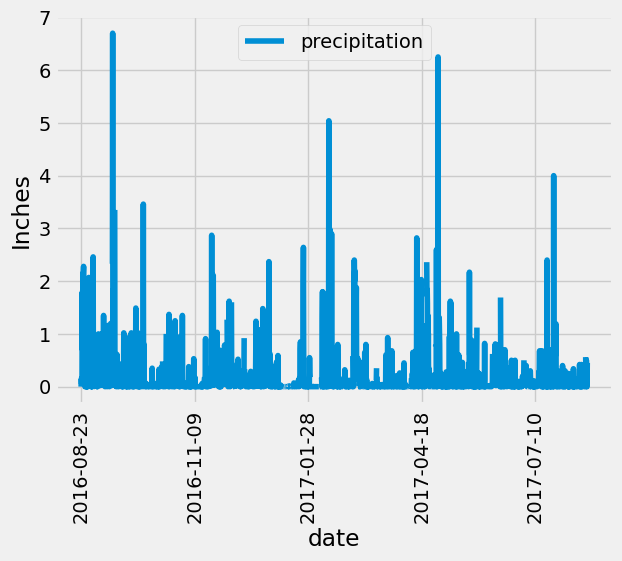

In [38]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
one_year_prior = dt.datetime(*year) - dt.timedelta(days = 366)
#one_year_prior = "2016-08-23"
# Perform a query to retrieve the data and precipitation scores
date_precip = session.query(measure.date, measure.prcp).filter(measure.date >= one_year_prior).order_by(measure.date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
precip_dt = pd.DataFrame(date_precip, columns=['date', 'precipitation'])

# Sort the dataframe by date
#precip_dt['date'] = pd.to_datetime(precip_dt['date'])
precip_dt = precip_dt.sort_values(by='date')
precip_dt.set_index('date', inplace=True)
precip_dt
# Use Pandas Plotting with Matplotlib to plot the data
precip_dt.plot(rot = 90)
plt.ylabel('Inches')

In [39]:
# Use Pandas to calculate the summary statistics for the precipitation data
precip_dt.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [20]:
# Design a query to calculate the total number of stations in the dataset
session.query(station).count()

9

In [48]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations = session.query(measure.station, func.count(measure.station)).group_by(measure.station).order_by(func.count(measure.station).desc()).all()

In [54]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active = active_stations[0][0]
most_active

session.query(func.min(measure.tobs), func.max(measure.tobs), func.avg(measure.tobs)).filter(most_active == measure.station).all()

[(54.0, 85.0, 71.66378066378067)]

<Axes: ylabel='Frequency'>

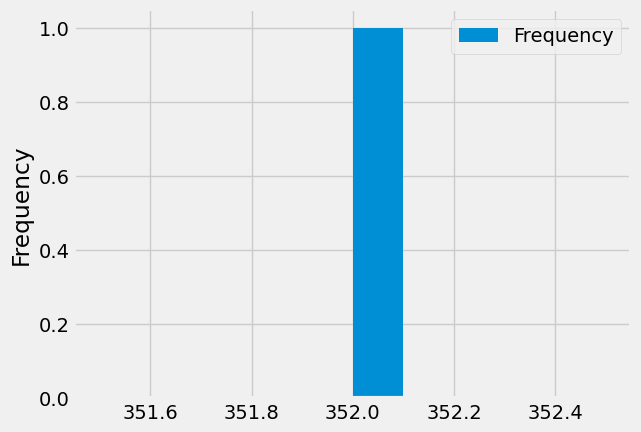

In [58]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp = session.query(measure.tobs, func.count(measure.tobs)).filter(measure.date >= one_year_prior).filter(most_active == measure.station)

temp_dt = pd.DataFrame(temp, columns = ['Temperature', 'Frequency'])
temp_dt.set_index('Temperature', inplace=True)
temp_dt.plot(kind='hist')

# Close Session

In [16]:
# Close Session
session.close()